In [1]:
import numpy as np
import matplotlib.pyplot as plt
from aeons.endpoint import EndModel
from aeons.utils import *
from aeons.beta import *
from aeons.plotting import plot_quantiles

In [9]:
name, samples = get_samples('rastrigin_8', reduced=False)

,p0,p1,p2,p3,p4
p0,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...
p1,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...,OffDiagona...
p2,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...,OffDiagona...
p3,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...,OffDiagona...
p4,OffDiagona...,OffDiagona...,OffDiagona...,OffDiagona...,DiagonalAx...


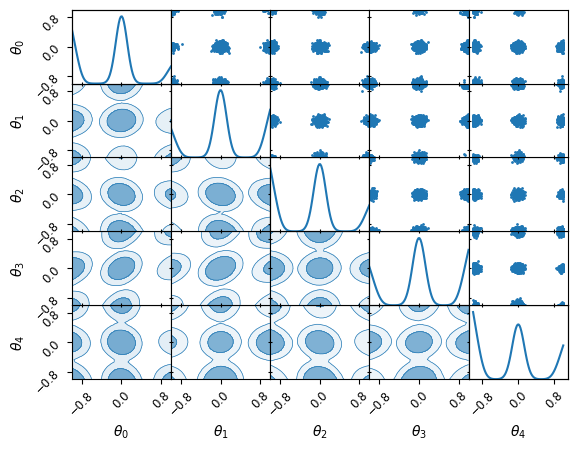

In [12]:
samples.plot_2d(['p0', 'p1', 'p2', 'p3', 'p4'])

In [16]:
name, samples = get_samples('cauchy_85')
model = EndModel(samples)
true_endpoint = model.true_endpoint()
logXf_true = samples.logX().iloc[true_endpoint]

In [17]:
iterations = make_iterations(true_endpoint, 50)
logXs = samples.logX().iloc[iterations]
logXfs, d_Gs = model.inferences(get_d_G_post, iterations, Nset=50)

 Iteration 47446 of 47446, d=14.65

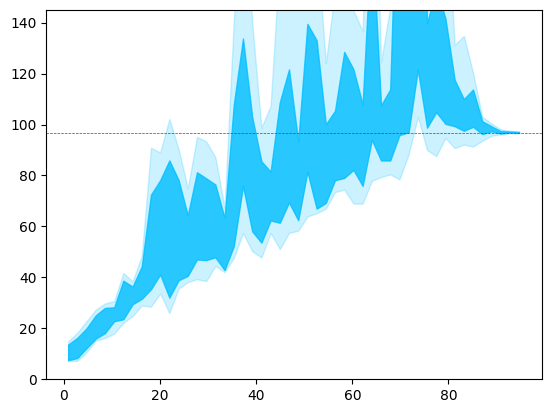

In [18]:
plot_quantiles(-logXs, -logXfs, -logXf_true, (0, 1.5))

In [6]:
write_to_txt(f'{data_dir}/logXfs/post/{name}.txt', [iterations, *logXfs])
write_to_txt(f'{data_dir}/d_Gs/post/{name}.txt', [iterations, *d_Gs])

# Make plots

In [21]:
figsettings()

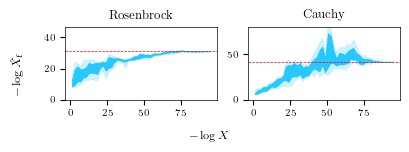

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(4, 1.5))
chains = ['rosenbrock_10', 'cauchy_82']
titles = ['Rosenbrock', 'Cauchy']

for ax, chain, title in zip(axs, chains, titles):
    name, samples = get_samples(chain)
    model = EndModel(samples)
    true_endpoint = model.true_endpoint()
    logXf_true = samples.logX().iloc[true_endpoint]

    iterations, *logXfs = read_from_txt(f'{data_dir}/logXfs/post/{name}.txt')
    logXfs = np.array(logXfs)
    plot_quantiles(-logXs, -logXfs, -logXf_true, (0, 1.5), ax=ax)
    ax.set_title(title)

axs[1].set_ylim(0, 80)
fig.supxlabel('$-\\log X$', y=0.05)
fig.supylabel('$-\\log \\hat{{X}}_\\mathrm{{f}}$', x=0)
fig.tight_layout()